In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings
%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
sns.set()
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.sans-serif'] = ['Simhei']

In [2]:
df = pd.read_csv('result_new.csv')
###加这行就是年度的，不加就是季度的
df = df[df['月份']==12]
###加这行去除极端值
#df = df[(df['Z']>=-9) & (df['Z']<=9)]

### 描述性统计 

In [3]:
def my_describe(df_):
    features = []
    for k in range(2000,2019):
        tmp = df_[df_['年份'] == k]['Z']
        features.append(k)
        features.append(tmp.count())
        features.append(tmp.mean())
        features.append(tmp.median())
        features.append(tmp.var())
        features.append(tmp.max())
        features.append(tmp.min())
        features.append(tmp.skew())
        features.append(tmp.kurt())
    col = ['年份', '样本量', '均值', '中位数', '方差', '最大值', '最小值', '偏度', '峰度']
    temp = pd.DataFrame(np.array(features).reshape(19, -1), columns = col)
    temp['年份'] = temp['年份'].astype(int)
    temp['样本量'] = temp['样本量'].astype(int)
    temp = temp.set_index('年份')
    return temp

In [4]:
df_ = df[(df['类型'] == '中央国有企业')|(df['类型'] == '地方国有企业')|(df['类型'] == '民营企业')]
temp = my_describe(df_)
temp

,样本量,均值,中位数,方差,最大值,最小值,偏度,峰度
年份,,,,,,,,
2000,60,3.826816,2.847892,13.534609,18.665803,-1.039212,2.504497,6.716571
2001,306,3.500272,2.495797,28.888479,64.465004,-14.545674,7.981569,83.314361
2002,504,2.868714,2.406860,13.011623,52.212796,-18.114999,7.569348,98.732846
2003,530,2.697140,2.164819,6.614069,26.198191,-8.505592,3.732178,25.784710
2004,571,2.474176,1.984199,18.410054,45.125131,-49.463607,1.342229,75.268541
2005,570,2.092327,1.852458,7.546865,22.978666,-32.957303,-2.079868,57.523001
2006,572,2.456702,2.002171,5.078259,18.254398,-6.876112,2.398993,11.188570
2007,600,3.942844,3.078494,14.586146,33.025499,-3.267874,3.799139,20.055077
2008,625,2.507401,2.035110,5.974538,21.625694,-7.063641,2.940962,16.643326


In [5]:
df_ = df[(df['类型'] == '中央国有企业')]
temp = my_describe(df_)
temp

,样本量,均值,中位数,方差,最大值,最小值,偏度,峰度
年份,,,,,,,,
2000,17,3.631946,3.699862,3.033376,8.324435,1.745295,1.217114,1.934594
2001,100,3.566659,2.732466,8.382794,19.076677,-0.167365,2.369164,8.431731
2002,161,2.820787,2.447640,7.565375,17.756470,-18.114999,-1.299799,25.688424
2003,174,2.883881,2.388258,5.749194,17.912507,-1.322202,2.859130,11.972971
2004,193,2.663136,2.171108,15.314886,45.125131,-15.085978,6.624249,74.818385
2005,197,2.195269,1.995218,4.362847,11.181966,-13.302449,-0.913368,17.453017
2006,203,2.558265,2.148797,4.915897,18.254398,-3.213827,2.748215,14.039697
2007,212,4.015213,3.097045,15.142728,31.361525,-0.486958,3.705307,18.222063
2008,224,2.714613,2.081949,8.634764,21.625694,-1.032641,3.650728,17.334303


In [6]:
df_ = df[(df['类型'] == '地方国有企业')]
temp = my_describe(df_)
temp

,样本量,均值,中位数,方差,最大值,最小值,偏度,峰度
年份,,,,,,,,
2000,35,3.733096,2.493505,17.206401,18.665803,-1.039212,2.353868,5.617054
2001,176,3.200909,2.403373,23.737763,55.741121,-14.545674,7.343783,79.140770
2002,301,2.826256,2.305337,12.150496,52.212796,-6.817017,9.723447,134.882190
2003,313,2.621444,2.086922,7.224499,26.198191,-8.505592,4.178135,32.187804
2004,332,2.418264,1.928671,22.215373,40.916488,-49.463607,-0.463985,68.659740
2005,328,2.107512,1.805192,9.987040,22.978666,-32.957303,-2.218344,55.199631
2006,325,2.463710,1.920996,5.552913,16.527410,-6.876112,2.248922,9.417616
2007,340,3.931395,3.003176,14.708269,33.025499,-3.267874,3.923652,21.735715
2008,353,2.425899,1.936347,4.367216,14.087440,-5.497020,2.037227,8.592803


In [7]:
df_ = df[(df['类型'] == '民营企业')]
temp = my_describe(df_)
temp

,样本量,均值,中位数,方差,最大值,最小值,偏度,峰度
年份,,,,,,,,
2000,8,4.650943,3.144940,22.657690,16.107325,1.258837,2.529697,6.739079
2001,30,5.035246,2.519003,128.968381,64.465004,0.143052,5.277946,28.482739
2002,42,3.356725,1.956107,40.934697,41.967854,0.035230,5.643559,34.283990
2003,43,2.492489,2.010823,5.726808,12.166483,-1.187607,3.036312,11.052737
2004,46,2.084906,1.917340,4.112990,9.301907,-2.580508,1.542640,5.727230
2005,45,1.530988,1.531700,3.566899,7.023998,-5.284798,-0.778976,4.522074
2006,44,1.936361,1.833017,2.174595,5.957392,-2.325311,-0.259448,2.293668
2007,48,3.704316,3.307002,11.744608,22.246617,-2.687121,3.309281,18.223373
2008,48,2.139794,2.195140,5.252136,7.827397,-7.063641,-1.501721,5.913215


### 盒状图 

In [ ]:
#df = df[(df['Z']>=-9) & (df['Z']<=9)]

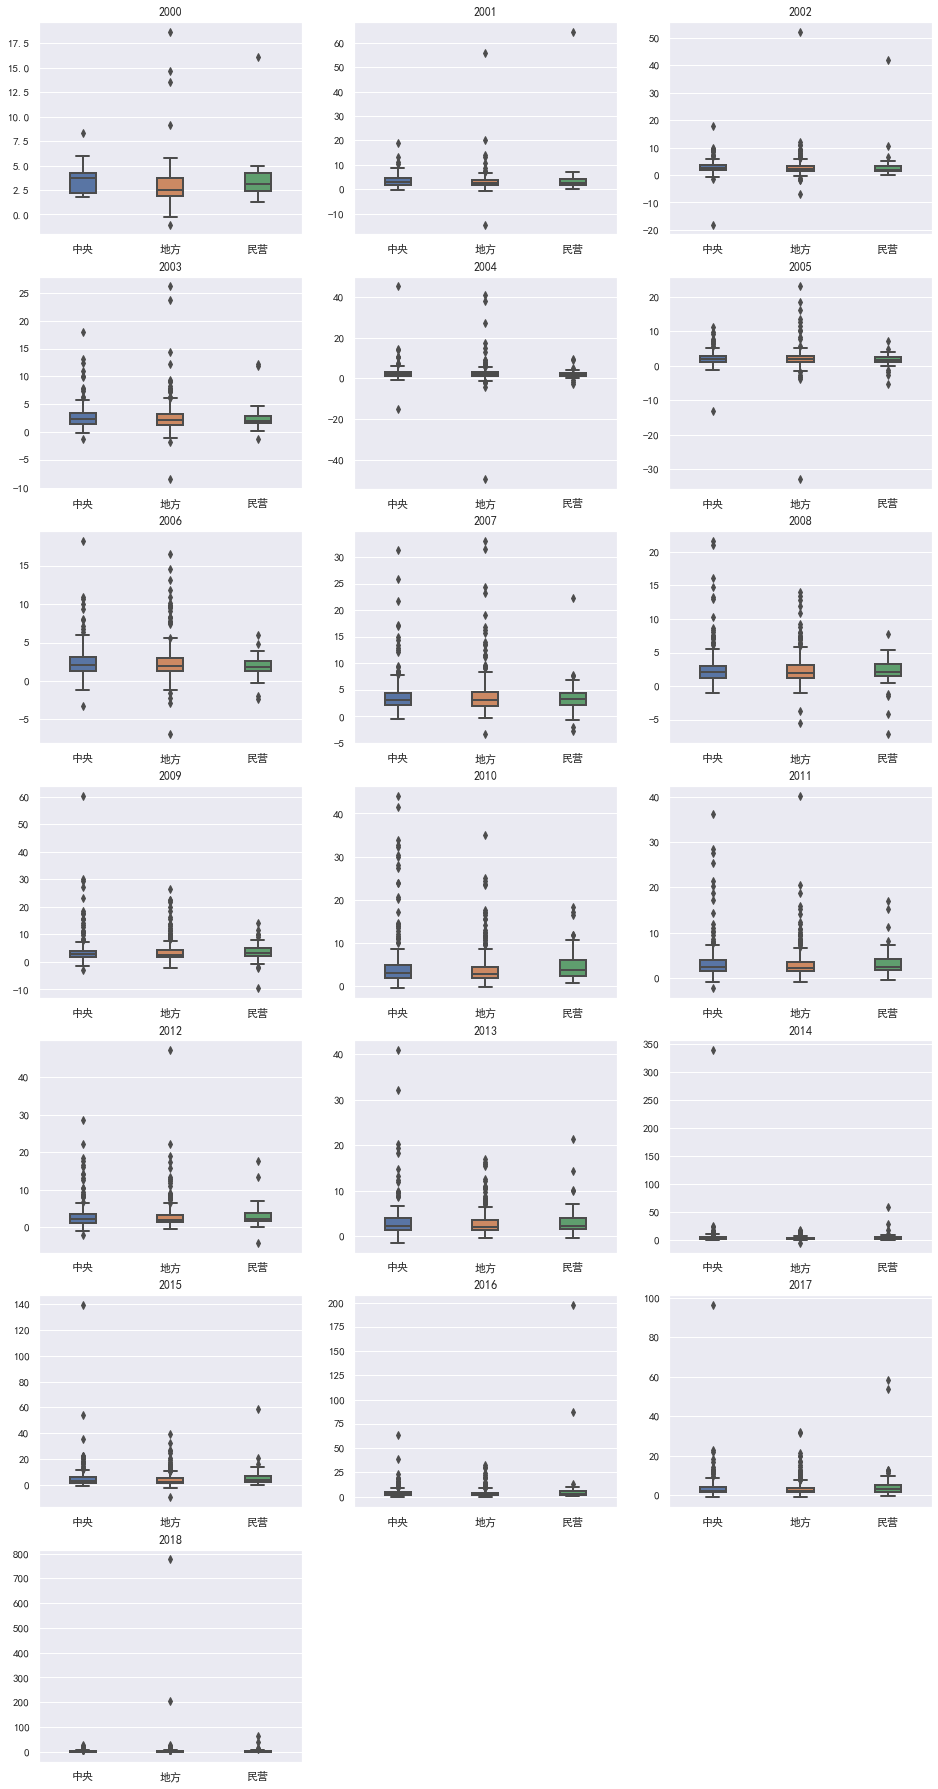

In [8]:
plt.figure(figsize=(16, 32))
for i in range(1,20):
    plt.subplot(7,3,i)
    df_ = df[df['年份'] == i+1999]
    a = df_[df_['类型'] == '中央国有企业']['Z'].reset_index(drop=True)
    b = df_[df_['类型'] == '地方国有企业']['Z'].reset_index(drop=True)
    c = df_[df_['类型'] == '民营企业']['Z'].reset_index(drop=True)
    k = pd.concat([a,b,c], axis=1)
    k.columns = ['中央', '地方', '民营']
    sns.boxplot(data=k, linewidth=2, width=0.3)
    plt.title(str(i+1999))
plt.show()

### 折线图 

In [10]:
df = pd.read_csv('result_new.csv')
df.columns

Index(['证券代码', '类型', '日期', '未分配利润', '盈余公积', '流动资产合计', '资产总计', '流动负债合计', '负债合计',
       '所有者权益合计', '营业收入', '利润总额', '财务费用', '年份', '月份', '总股本', '流通股本', '非流通股本',
       '流通市值', 'X1', 'X2', 'X3', 'X4', 'X5', 'Z'],
      dtype='object')

In [24]:
df = pd.read_csv('result_new.csv')
aa = df[df['类型'] == '中央国有企业'].reset_index(drop=True)
bb = df[df['类型'] == '地方国有企业'].reset_index(drop=True)
cc = df[df['类型'] == '民营企业'].reset_index(drop=True)
kk = pd.concat([aa.groupby(['日期'])['Z'].mean(),bb.groupby(['日期'])['Z'].mean(),cc.groupby(['日期'])['Z'].mean()],axis = 1)
kk.columns = ['中央', '地方', '民营']
kk = kk.reset_index()
kk = kk.sort_values('日期', ascending=True)
kk = kk.drop('日期',axis = 1)
kk = kk.reset_index(drop=True)

In [25]:
kk = kk.fillna(method = 'bfill')

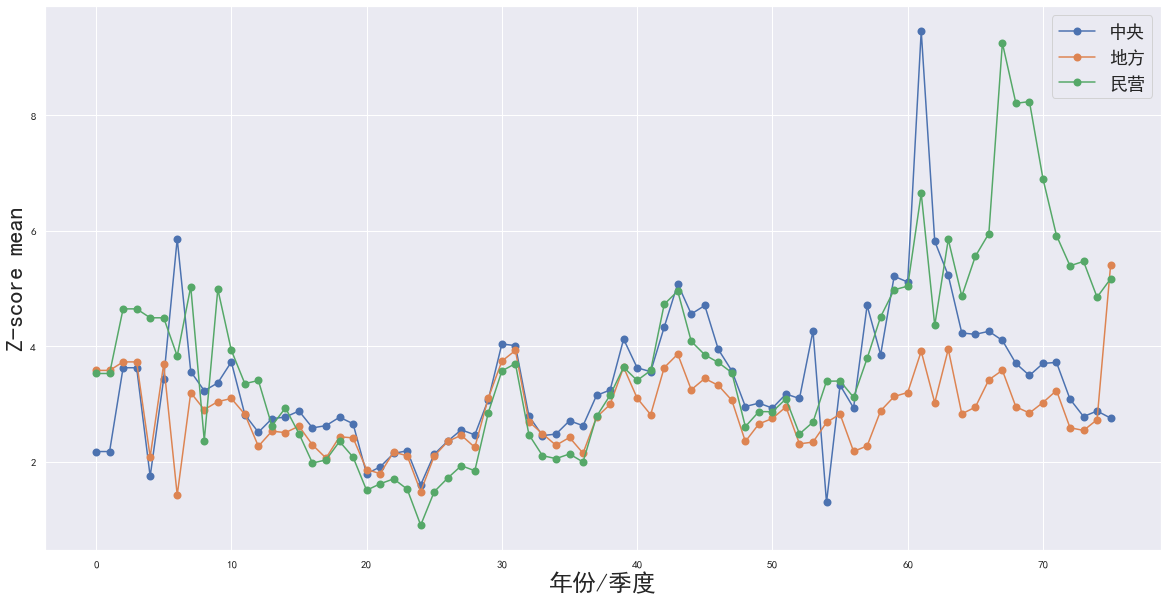

In [26]:
plt.figure(figsize=(20, 10))
plt.plot(kk, marker='.', markeredgewidth=5)
#x = ['10/Q1','10/Q2','10/Q3','10/Q4','11/Q1','11/Q2','11/Q3','11/Q4','12/Q1', '12/Q2', '12/Q3', '12/Q4', 
#     '13/Q1','13/Q2','13/Q3','13/Q4','14/Q1','14/Q2','14/Q3','14/Q4','15/Q1', '15/Q2', '15/Q3', '15/Q4',
#     '16/Q1','16/Q2','16/Q3','16/Q4','17/Q1','17/Q2','17/Q3','17/Q4','18/Q1', '18/Q2', '18/Q3', '18/Q4']
#plt.xticks(range(36), x)
plt.xlabel('年份/季度', fontsize=24)
plt.ylabel("Z-score mean", fontsize=24)
plt.legend(kk.columns, fontsize=18)
plt.show()

In [8]:
df = pd.read_csv('result_new.csv')
df = df[df['月份']==12]
df = df[(df['Z']>=-9) & (df['Z']<=9)]
aa = df[df['类型'] == '中央国有企业'].reset_index(drop=True)
bb = df[df['类型'] == '地方国有企业'].reset_index(drop=True)
cc = df[df['类型'] == '民营企业'].reset_index(drop=True)
kk = pd.concat([aa.groupby(['日期'])['Z'].mean(),bb.groupby(['日期'])['Z'].mean(),cc.groupby(['日期'])['Z'].mean()],axis = 1)
kk.columns = ['中央', '地方', '民营']
kk = kk.reset_index()
kk = kk.sort_values('日期', ascending=True)
kk = kk.drop('日期',axis = 1)
kk = kk.reset_index(drop=True)

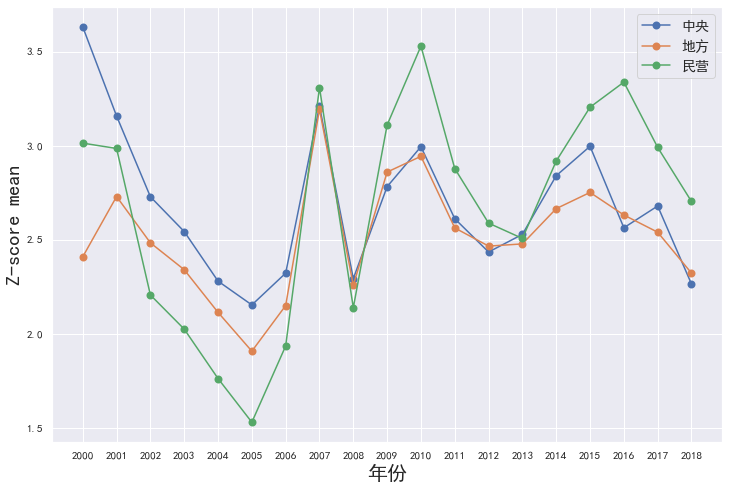

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(kk, marker='.', markeredgewidth=5)
x = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', 
     '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
plt.xticks(range(19), x)
plt.xlabel('年份', fontsize=20)
plt.ylabel("Z-score mean", fontsize=20)
plt.legend(kk.columns, fontsize=14)
plt.show()

### BIN 

In [3]:
a = df[['X1','X2','X3','X4','X5','Z']].replace(np.inf,0)
a = a.replace(-np.inf,0)
a.describe()

,X1,X2,X3,X4,X5,Z
count,12470.000000,12408.000000,12457.000000,11154.000000,12569.000000,10972.000000
mean,0.103032,0.009609,0.054378,3.763941,0.760860,3.388077
std,0.272825,5.768348,0.325686,10.789189,4.176329,9.588482
min,-7.566171,-624.163846,-3.587045,-0.423430,0.000000,-49.463607
25%,-0.047651,0.043835,0.026960,0.835695,0.350564,1.377927
50%,0.104878,0.101255,0.048911,1.684043,0.576136,2.253804
75%,0.269131,0.178667,0.078993,3.615990,0.896346,3.700922
max,0.969807,0.771414,33.234706,562.215531,462.917178,777.406182
